In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [140]:
df=pd.read_csv(r"C:\Users\vivaa\OneDrive\Desktop\Loan Approval & Credit Risk Predictor\Datasets\Cleaned Loan_approval_dataset")

In [141]:
df.head()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [142]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)


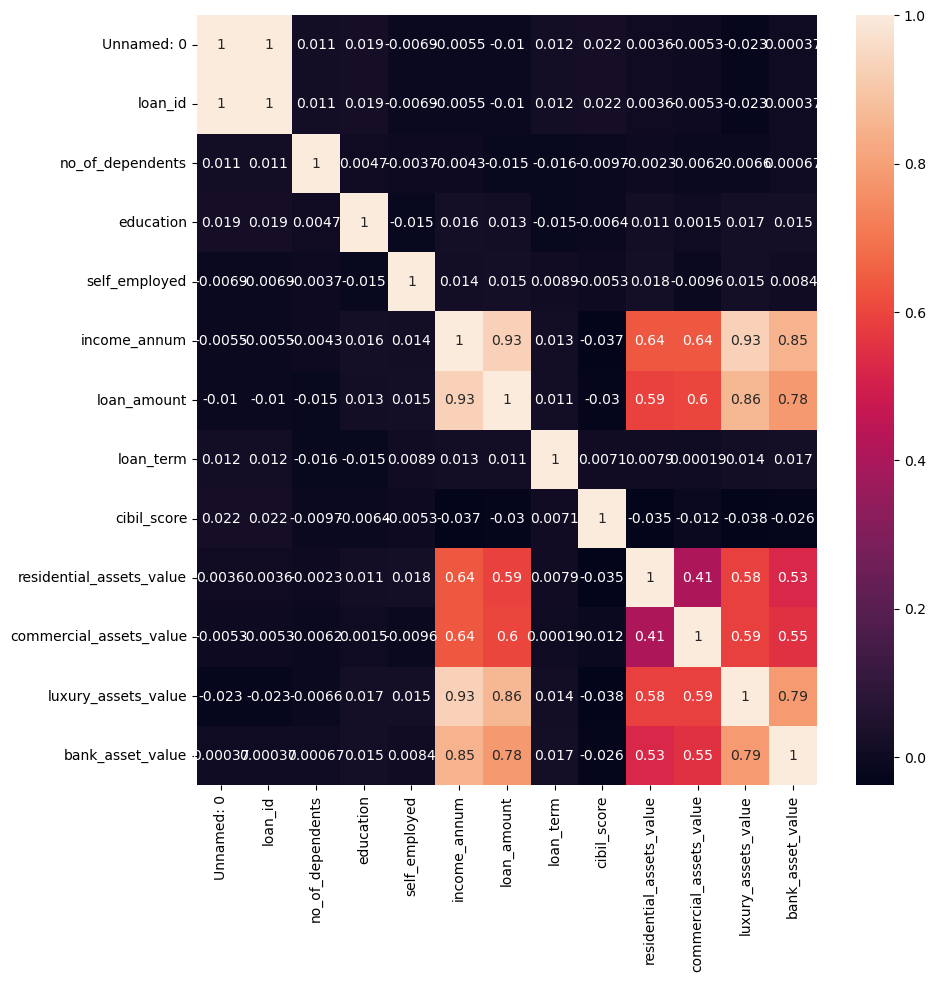

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True);
plt.show()

In [144]:
X_train.corr()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
Unnamed: 0,1.000000,1.000000,0.011236,0.019496,-0.006914,-0.005549,-0.010106,0.012421,0.021571,0.003573,-0.005328,-0.022626,0.000374
loan_id,1.000000,1.000000,0.011236,0.019496,-0.006914,-0.005549,-0.010106,0.012421,0.021571,0.003573,-0.005328,-0.022626,0.000374
no_of_dependents,0.011236,0.011236,1.000000,0.004677,-0.003651,-0.004299,-0.014543,-0.015800,-0.009656,-0.002317,-0.006165,-0.006617,0.000670
education,0.019496,0.019496,0.004677,1.000000,-0.014975,0.016294,0.012643,-0.014962,-0.006423,0.011308,0.001475,0.016724,0.015386
self_employed,-0.006914,-0.006914,-0.003651,-0.014975,1.000000,0.014026,0.015433,0.008862,-0.005289,0.018275,-0.009613,0.015202,0.008354
income_annum,-0.005549,-0.005549,-0.004299,0.016294,0.014026,1.000000,0.928570,0.012931,-0.036913,0.635426,0.637625,0.929149,0.849272
loan_amount,-0.010106,-0.010106,-0.014543,0.012643,0.015433,0.928570,1.000000,0.011179,-0.029775,0.591436,0.599363,0.859914,0.784825
loan_term,0.012421,0.012421,-0.015800,-0.014962,0.008862,0.012931,0.011179,1.000000,0.007089,0.007932,0.000187,0.013691,0.016915
cibil_score,0.021571,0.021571,-0.009656,-0.006423,-0.005289,-0.036913,-0.029775,0.007089,1.000000,-0.035194,-0.011607,-0.037932,-0.025818
residential_assets_value,0.003573,0.003573,-0.002317,0.011308,0.018275,0.635426,0.591436,0.007932,-0.035194,1.000000,0.407874,0.584714,0.525566


In [145]:
for index, row in X_train.corr().iterrows():
    for value in row:
        if(value>0.8 and value!=1):
            print(index)

income_annum
income_annum
income_annum
loan_amount
loan_amount
luxury_assets_value
luxury_assets_value
bank_asset_value


In [146]:
X_train.drop(['luxury_assets_value','bank_asset_value','loan_id'],axis=1,inplace=True)
X_test.drop(['luxury_assets_value','bank_asset_value','loan_id'],axis=1,inplace=True)

In [147]:
X_train.head()

,Unnamed: 0,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value
1675,1675,5,0,0,7900000,29900000,6,568,5800000,13900000
1164,1164,0,0,1,9600000,34000000,12,710,23800000,10300000
192,192,1,1,0,800000,2900000,8,682,2200000,1100000
910,910,2,1,1,4900000,13100000,18,754,8200000,3300000
567,567,5,1,1,3000000,11100000,12,441,8500000,2500000


In [148]:
X_train.shape

(3415, 10)

In [149]:
X_train.drop('Unnamed: 0',axis=1,inplace=True)
X_test.drop('Unnamed: 0',axis=1,inplace=True)

In [150]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value
1675,5,0,0,7900000,29900000,6,568,5800000,13900000
1164,0,0,1,9600000,34000000,12,710,23800000,10300000
192,1,1,0,800000,2900000,8,682,2200000,1100000
910,2,1,1,4900000,13100000,18,754,8200000,3300000
567,5,1,1,3000000,11100000,12,441,8500000,2500000


In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [152]:
print("Scaler expects:",scaler.n_features_in_)


Scaler expects: 9


In [153]:
import pickle

with open("Scaler_new.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [154]:
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train.columns,index=X_train.index)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test.columns,index=X_test.index)

In [155]:
X_train_normalized

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value
1675,1.0,0.0,0.0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495
1164,0.0,0.0,1.0,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928
192,0.2,1.0,0.0,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701
910,0.4,1.0,1.0,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103
567,1.0,1.0,1.0,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866
...,...,...,...,...,...,...,...,...,...
3444,0.0,1.0,1.0,0.113402,0.112245,0.777778,0.383333,0.113014,0.051546
466,1.0,0.0,1.0,0.030928,0.038265,0.888889,0.185000,0.037671,0.025773
3092,0.8,0.0,1.0,0.865979,0.517857,0.777778,0.248333,0.373288,0.546392
3772,0.4,0.0,1.0,0.701031,0.538265,0.555556,0.401667,0.130137,0.067010


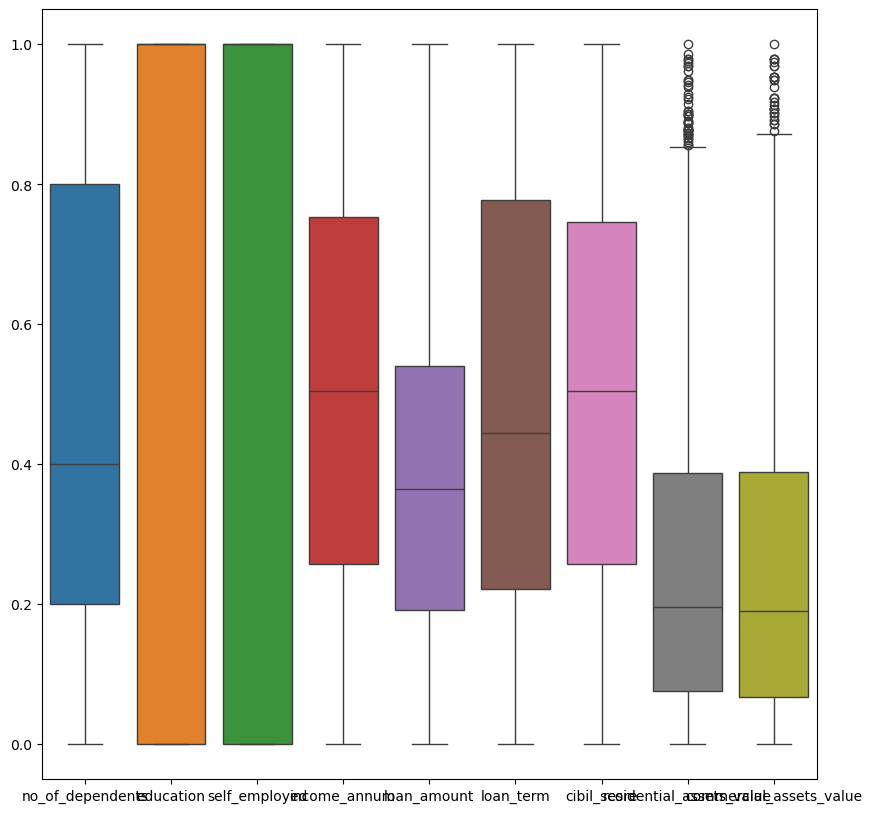

In [156]:
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train_normalized)
plt.show()

In [157]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC(probability=True, random_state=42)

svm_params = {
    "C": [0.01, 0.1, 1, 10, 100,150],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.01, 0.1, 1,2,3],
    "degree": [2, 3, 4]
}

random_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=svm_params,
    n_iter=5,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring="roc_auc"
)
random_svm.fit(X_train_normalized, y_train)

from sklearn.model_selection import cross_val_score

val_scores = cross_val_score(
    random_svm.best_estimator_,
    X_train_normalized,
    y_train,
    cv=5,
    scoring="accuracy"
)
print("Validation Accuracy (CV Mean):", val_scores.mean())
print("Validation Accuracy (CV Std):", val_scores.std())

y_pred = random_svm.predict(X_test_normalized)

score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Validation Accuracy (CV Mean): 0.9431918008784773
Validation Accuracy (CV Std): 0.005509483959656474
Accuracy: 0.9449648711943794
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       318
           1       0.96      0.96      0.96       536

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.95      0.94      0.94       854

Confusion Matrix:
 [[295  23]
 [ 24 512]]


In [158]:
import pickle

with open("SVM_final.pkl", "wb") as file:
    pickle.dump(random_svm, file)

In [159]:
random_svm.best_params_

{'kernel': 'poly', 'gamma': 1, 'degree': 4, 'C': 1}

In [160]:
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=42)


In [161]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

val_scores = cross_val_score(
    xg,
    X_train_normalized,
    y_train,
    cv=5,
    scoring="accuracy"
)
print("Validation Accuracy (CV Mean):", val_scores.mean())
print("Validation Accuracy (CV Std):", val_scores.std())

grid_search.fit(X_train_normalized, y_train)

best_xg = grid_search.best_estimator_

y_pred = best_xg.predict(X_test_normalized)

score = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Validation Accuracy (CV Mean): 0.9815519765739387
Validation Accuracy (CV Std): 0.005287106906374161
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Test Accuracy: 0.9789227166276346
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[305  13]
 [  5 531]]


In [162]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.983601756954612


In [163]:
from sklearn.metrics import roc_auc_score
y_prob = best_xg.predict_proba(X_test_normalized)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)


ROC AUC: 0.9983455364686005


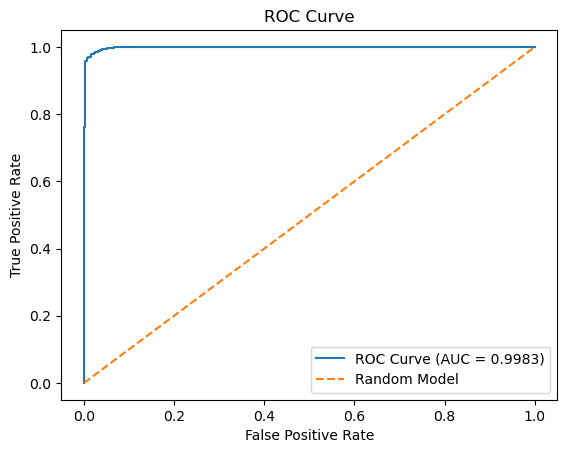

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [165]:
#import pickle
#
#with open("XgBoost.pkl", "wb") as file:
#    pickle.dump(grid, file)

In [166]:
logistic=LogisticRegression(random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [200, 500]
}

grid = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train_normalized,y_train)
val_scores = cross_val_score(
    random_svm.best_estimator_,
    X_train_normalized,
    y_train,
    cv=5,
    scoring="accuracy"
)

print("Validation Accuracy (CV Mean):", val_scores.mean())
print("Validation Accuracy (CV Std):", val_scores.std())

y_pred=grid.predict(X_test_normalized)
#print(y_pred)

score=accuracy_score(y_pred,y_test)
print("Score:",score)
print("Classification Report:\n",classification_report(y_pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))


Validation Accuracy (CV Mean): 0.9431918008784773
Validation Accuracy (CV Std): 0.005509483959656474
Score: 0.9063231850117096
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       314
           1       0.93      0.92      0.93       540

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
 [[276  38]
 [ 42 498]]


In [167]:
y_prob = random_svm.predict_proba(X_test_normalized)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)


ROC AUC: 0.8985145029569136


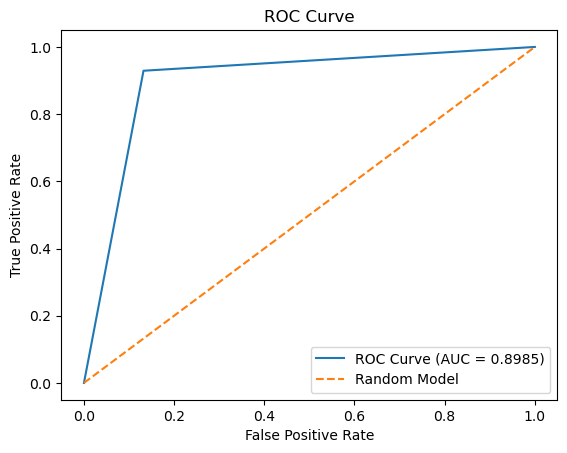

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [169]:
import pickle

with open("Logistic_Regression.pkl", "wb") as file:
    pickle.dump(grid, file)

In [170]:
rfc=RandomForestClassifier(random_state=42)

rf_params = {"max_depth": [5, 8, 15, None, 10],
"max_features": [5, 7, "auto", 8],
"min_samples_split": [2, 8, 15, 20],
"n_estimators": [100, 200, 500, 1000]}

random = RandomizedSearchCV(estimator=rfc,
param_distributions=rf_params,
n_iter=100,
cv=5,
verbose=2,
n_jobs=-1,scoring='ROC-AUC')

rfc.fit(X_train_normalized,y_train)

y_pred=rfc.predict(X_test)


score=accuracy_score(y_pred,y_test)
print("Score:",score)
print("Classification Report:\n",classification_report(y_pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Score: 0.6276346604215457
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77       854

    accuracy                           0.63       854
   macro avg       0.50      0.31      0.39       854
weighted avg       1.00      0.63      0.77       854

Confusion Matrix:
 [[  0   0]
 [318 536]]


c:\Users\vivaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vivaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vivaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [171]:
treeclassifier=DecisionTreeClassifier()
param={
'criterion':['gini','entropy', 'log_loss'],
'splitter':['best','random'],
'max_depth':[1,2,3,4,5],
'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='ROC-AUC')
treeclassifier.fit(X_train_normalized,y_train)
y_pred=treeclassifier.predict(X_test)

score=accuracy_score(y_pred,y_test)
print("Score:",score)
print("Classification Report:\n",classification_report(y_pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_pred,y_test))

Score: 0.6276346604215457
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77       854

    accuracy                           0.63       854
   macro avg       0.50      0.31      0.39       854
weighted avg       1.00      0.63      0.77       854

Confusion Matrix:
 [[  0   0]
 [318 536]]


c:\Users\vivaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vivaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vivaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
X_train.nunique().sort_values()


education                     2
self_employed                 2
no_of_dependents              6
loan_term                    10
income_annum                 98
commercial_assets_value     185
residential_assets_value    277
loan_amount                 375
cibil_score                 599
dtype: int64

In [173]:
X_train.var().sort_values()


self_employed               2.500175e-01
education                   2.500715e-01
no_of_dependents            2.878439e+00
loan_term                   3.273136e+01
cibil_score                 2.964895e+04
income_annum                7.906543e+12
commercial_assets_value     1.910824e+13
residential_assets_value    4.282197e+13
loan_amount                 8.217398e+13
dtype: float64